<a href="https://colab.research.google.com/github/Dibeo/Projet-UE-IA-M1-TI/blob/main/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from git import Repo

Repo.clone_from("https://github.com/phuongntmse/ts-data-for-workload-classification", "data")


<git.repo.base.Repo '/content/data/.git'>

In [ ]:
from os import listdir
from os.path import isfile, join
import os

onlyfiles = []
for root, dirs, files in os.walk("data"):
    for file in files:
        onlyfiles.append(os.path.join(root, file))
print(onlyfiles)

['data/README.md', 'data/disk-10/disk-10_data_18.csv', 'data/disk-10/disk-10_data_02.csv', 'data/disk-10/disk-10_data_03.csv', 'data/disk-10/disk-10_data_07.csv', 'data/disk-10/disk-10_data_23.csv', 'data/disk-10/disk-10_data_05.csv', 'data/disk-10/disk-10_data_16.csv', 'data/disk-10/disk-10_data_17.csv', 'data/disk-10/disk-10_data_29.csv', 'data/disk-10/disk-10_data_09.csv', 'data/disk-10/disk-10_data_06.csv', 'data/disk-10/disk-10_data_01.csv', 'data/disk-10/disk-10_data_25.csv', 'data/disk-10/disk-10_data_13.csv', 'data/disk-10/disk-10_data_24.csv', 'data/disk-10/disk-10_data_21.csv', 'data/disk-10/disk-10_data_22.csv', 'data/disk-10/disk-10_data_30.csv', 'data/disk-10/disk-10_data_14.csv', 'data/disk-10/disk-10_data_20.csv', 'data/disk-10/disk-10_data_10.csv', 'data/disk-10/disk-10_data_26.csv', 'data/disk-10/disk-10_data_15.csv', 'data/disk-10/disk-10_data_11.csv', 'data/disk-10/disk-10_data_27.csv', 'data/disk-10/disk-10_data_08.csv', 'data/disk-10/disk-10_data_12.csv', 'data/dis

In [ ]:
import pandas as pd

# Assuming the first file in 'onlyfiles' is the one to be loaded.
first_csv_file = onlyfiles[1]  # Index 0 is README.md, so taking the first actual data file.
df = pd.read_csv(first_csv_file)
display(df.head())

,Timestamp,CpuALL_usage,Cpu0_usage,Cpu1_usage,Cpu2_usage,Cpu3_usage,Cpu4_usage,Cpu5_usage,Cpu6_usage,Cpu7_usage,...,Cpu34_usage,Cpu35_usage,cpu_frequency,memory_usage,Reads_on_sda,Writes_on_sda,Energy_usage_during_time,memory_usage_perce,write_rate_during_time,read_rate_during_time
0,1.760581e+09,3.94,2.52,2.59,6.37,2.87,2.39,3.34,6.75,5.43,...,6.75,9.33,2429,2528544,18068,814114,5012682.0,2.597908,1.0,0.0
1,1.760581e+09,3.94,2.52,2.59,6.37,2.87,2.39,3.34,6.75,5.43,...,6.75,9.33,2378,2527808,18068,814114,4863757.0,2.597152,0.0,0.0
2,1.760581e+09,3.94,2.52,2.59,6.37,2.87,2.39,3.34,6.75,5.43,...,6.75,9.33,2335,2528124,18068,814114,4630176.0,2.597477,0.0,0.0
3,1.760581e+09,3.94,2.52,2.59,6.37,2.87,2.39,3.34,6.75,5.43,...,6.75,9.33,2775,2539132,18068,814116,5889939.0,2.608786,2.0,0.0
4,1.760581e+09,3.94,2.52,2.59,6.37,2.87,2.39,3.34,6.75,5.43,...,6.75,9.33,2399,2539496,18068,814118,4636524.0,2.609160,2.0,0.0


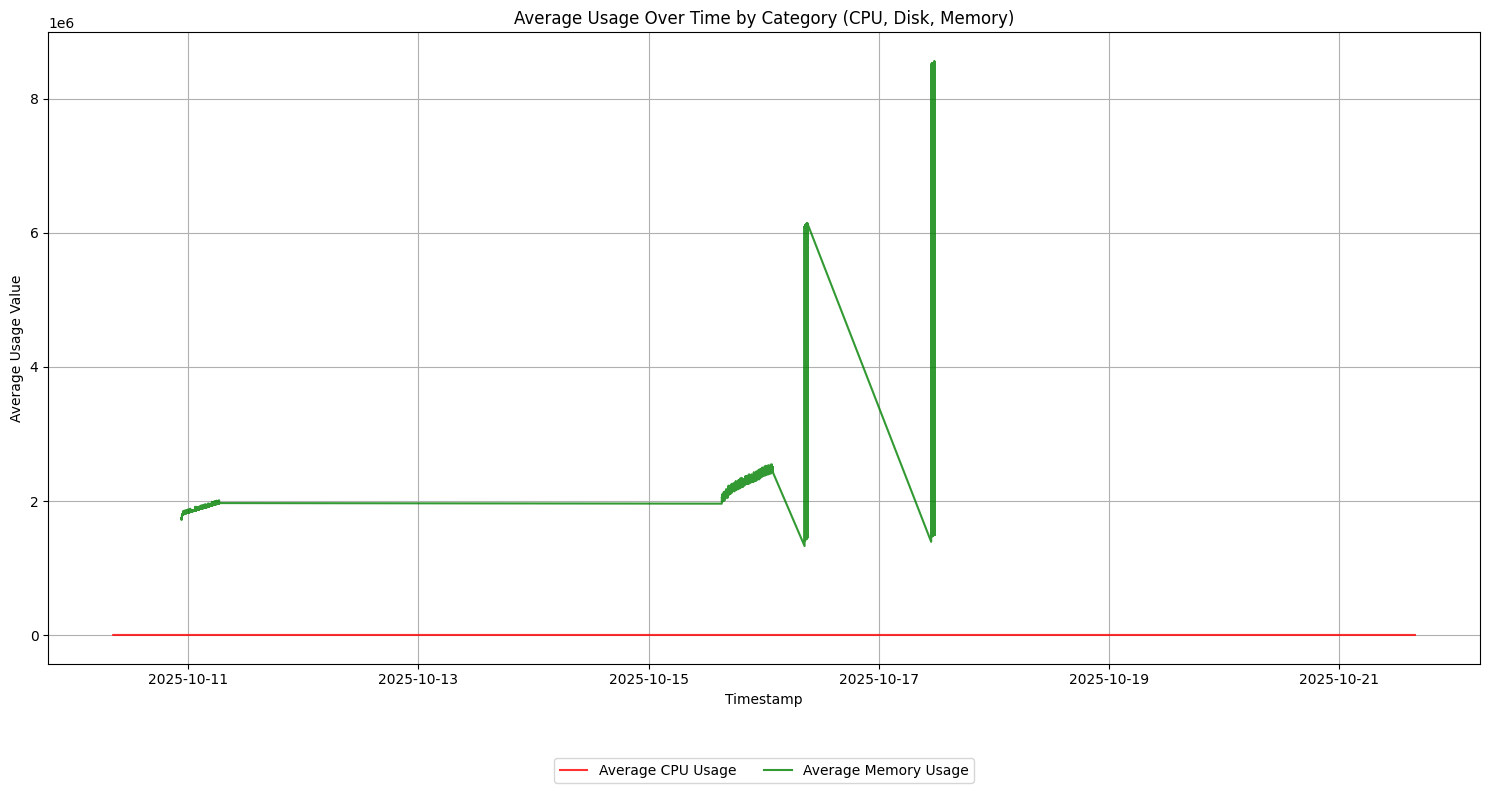

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Define colors for each category
category_colors = {
    'cpu': 'red',
    'disk': 'blue',
    'memory': 'green'
}

# Define which column to plot for each category
category_columns = {
    'cpu': 'CpuALL_usage',
    'memory': 'memory_usage',
    'disk': 'Reads_on_sda' # Assuming Reads_on_sda is a good representative for disk usage
}

# Collect all data for each category
all_cpu_data = []
all_disk_data = []
all_memory_data = []

for file_path in onlyfiles:
    # Skip non-csv files or README.md
    if not file_path.endswith('.csv') or 'README.md' in file_path:
        continue

    category = None
    if 'cpu-' in file_path.lower():
        category = 'cpu'
    elif 'disk-' in file_path.lower():
        category = 'disk'
    elif 'memory-' in file_path.lower():
        category = 'memory'

    if category:
        try:
            df_temp = pd.read_csv(file_path)
            if 'Timestamp' in df_temp.columns and category_columns[category] in df_temp.columns:
                # Convert timestamp to datetime and set as index for potential resampling/grouping
                df_temp['Timestamp'] = pd.to_datetime(df_temp['Timestamp'], unit='s')
                # Select only the relevant columns and append to the list
                if category == 'cpu':
                    all_cpu_data.append(df_temp[['Timestamp', category_columns[category]]])
                #elif category == 'disk':
                    #all_disk_data.append(df_temp[['Timestamp', category_columns[category]]])
                elif category == 'memory':
                    all_memory_data.append(df_temp[['Timestamp', category_columns[category]]])
            else:
                print(f"Skipping {file_path}: missing 'Timestamp' or '{category_columns[category]}' column.")
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

plt.figure(figsize=(15, 8))

# Process and plot CPU data
if all_cpu_data:
    combined_cpu_df = pd.concat(all_cpu_data)
    aggregated_cpu = combined_cpu_df.groupby('Timestamp')[category_columns['cpu']].mean().reset_index()
    plt.plot(aggregated_cpu['Timestamp'], aggregated_cpu[category_columns['cpu']], label='Average CPU Usage', color=category_colors['cpu'], alpha=0.8)

# Process and plot Disk data
if all_disk_data:
    combined_disk_df = pd.concat(all_disk_data)
    aggregated_disk = combined_disk_df.groupby('Timestamp')[category_columns['disk']].mean().reset_index()
    plt.plot(aggregated_disk['Timestamp'], aggregated_disk[category_columns['disk']], label='Average Disk Reads', color=category_colors['disk'], alpha=0.8)

# Process and plot Memory data
if all_memory_data:
    combined_memory_df = pd.concat(all_memory_data)
    aggregated_memory = combined_memory_df.groupby('Timestamp')[category_columns['memory']].mean().reset_index()
    plt.plot(aggregated_memory['Timestamp'], aggregated_memory[category_columns['memory']], label='Average Memory Usage', color=category_colors['memory'], alpha=0.8)

plt.title('Average Usage Over Time by Category (CPU, Disk, Memory)')
plt.xlabel('Timestamp')
plt.ylabel('Average Usage Value')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()